In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
comments = pd.read_csv('GBcomments.csv', error_bad_lines=False)
comments

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


video_id                                       comment_text  likes  \
0       jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1       jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2       jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3       jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4       jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
...             ...                                                ...    ...   
718447  lLN1FwiqGwc                            MEME ME MEME ME MEME ME      0   
718448  lLN1FwiqGwc                    Yeah, but does everybody float?      0   
718449  lLN1FwiqGwc                                That meme me dace 😂      0   
718450  lLN1FwiqGwc                     10:43 Is that Miles Upshur????      2   
718451  lLN1FwiqGwc                                WA-HA\nWA-HA\nWA-HA      1   

        replies  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
718447        0  
718448        0  
718449        0  
718450        0  
718451        0  

[718452 rows x 4 columns]

# sentiment analysis of youtube_comments 

In [28]:
! pip install textblob

In [29]:
from textblob import TextBlob

Calculating the polarity of comments in the given data. first comment in the given dataset then a function.

In [30]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity #polarity of first comment.

0.45000000000000007

In [31]:
# finding null values
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [32]:
# drop all null values.
comments.dropna(inplace=True)

In [33]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [34]:
# create a list which will contain the polarity of all the comments in the given dataset.
polarity=[]

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [35]:
comments['polarity'] = polarity

In [36]:
comments

video_id                                       comment_text  likes  \
0       jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1       jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2       jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3       jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4       jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
...             ...                                                ...    ...   
718447  lLN1FwiqGwc                            MEME ME MEME ME MEME ME      0   
718448  lLN1FwiqGwc                    Yeah, but does everybody float?      0   
718449  lLN1FwiqGwc                                That meme me dace 😂      0   
718450  lLN1FwiqGwc                     10:43 Is that Miles Upshur????      2   
718451  lLN1FwiqGwc                                WA-HA\nWA-HA\nWA-HA      1   

        replies  polarity  
0             0      0.45  
1             0      0.00  
2             0      0.00  
3             0      0.00  
4             0      1.00  
...         ...       ...  
718447        0      0.00  
718448        0      0.00  
718449        0      0.00  
718450        0      0.00  
718451        0      0.00  

[718424 rows x 5 columns]

positive polarity 

In [37]:
comments_positive= comments[comments['polarity']==1]

In [38]:
comments_positive

video_id                                       comment_text  likes  \
4       jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26      jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80      jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158     YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175     YPVcg45W0z4                        Welcome to the Scandiworld!      0   
...             ...                                                ...    ...   
718390  lLN1FwiqGwc  I'm just stopping the video three minutes in t...      0   
718416  lLN1FwiqGwc  Beating up tommy wiseu was the best part of th...      0   
718432  lLN1FwiqGwc                         kudos for the mtg cards :D      0   
718440  lLN1FwiqGwc                   Tommy Wiseau is my greatest fear      0   
718443  lLN1FwiqGwc                                           The best      0   

        replies  polarity  
4             0       1.0  
26            2       1.0  
80            1       1.0  
158           0       1.0  
175           0       1.0  
...         ...       ...  
718390        0       1.0  
718416        0       1.0  
718432        0       1.0  
718440        0       1.0  
718443        0       1.0  

[20400 rows x 5 columns]

In [39]:
! pip install wordcloud

In [40]:
from wordcloud import WordCloud,STOPWORDS

In [41]:
stopwords=set(STOPWORDS)

In [42]:
total_comments= ''.join(comments_positive['comment_text'])

In [43]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

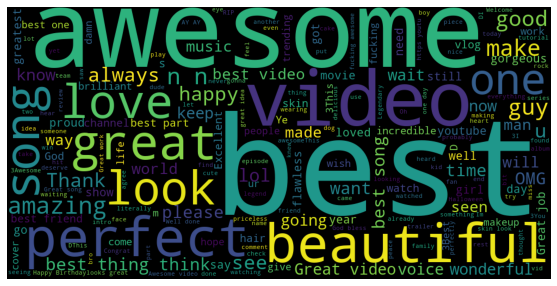

In [44]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Negative Polarity

In [45]:
comments_negative= comments[comments['polarity']==-1]

In [46]:
comments_negative

video_id                                       comment_text  likes  \
1387    ql0Op1VcELw                                             boring      0   
1394    ql0Op1VcELw                  0:22   **laughs at terrible pun**      1   
1530    -Ifnaxi2LQg          this is the worst thing i've heard. ever.      0   
1745    F2uJvwiSZAQ  People making jokes about 9/11 is truly disgus...      1   
1793    F2uJvwiSZAQ                                      Thats insane.      0   
...             ...                                                ...    ...   
717296  t8sgy0faXyg                                           Terrible      0   
717668  LunHybOKIjU                     this is terrible em you are 50      0   
717716  AUP3uhrM19c                  Not a penalty terrible decision!!      0   
717903  8pHPohFezIk                                Hazard was terrible      0   
718356  lLN1FwiqGwc         You are nuts. The leper looked terrifying.      0   

        replies  polarity  
1387          0      -1.0  
1394          1      -1.0  
1530          0      -1.0  
1745          0      -1.0  
1793          0      -1.0  
...         ...       ...  
717296        0      -1.0  
717668        0      -1.0  
717716        0      -1.0  
717903        0      -1.0  
718356        0      -1.0  

[3339 rows x 5 columns]

In [47]:
total_comments= ''.join(comments_negative['comment_text'])

In [48]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

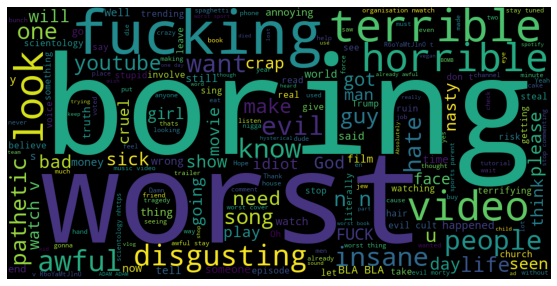

In [49]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Analysing tag column: Finding what is trending on youtube.

In [50]:
videos= pd.read_csv('USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [51]:
videos

video_id                                              title  \
0     XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1     K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2     cLdxuaxaQwc                                        My Response   
3     WYYvHb03Eog                          Apple iPhone X first look   
4     sjlHnJvXdQs                                  iPhone X (parody)   
...           ...                                                ...   
7987  xlu6i6lT_vk                     How Do MASSIVE Sinkholes Form?   
7988  qRoVlH1OcI4  Trump slams Clinton for defending NFL anthem p...   
7989  EoejGgUNmVU  LP - Lost On You (A Night at The McKittrick Ho...   
7990  MT1CMTI0EVw  Tré Melvin @ #YouTubeBlack FanFest Washington ...   
7991  AFxLA3RGjnc  First cosmic event seen in gravitational waves...   

                    channel_title  category_id  \
0                Logan Paul Vlogs           24   
1                           Apple           28   
2                       PewDiePie           22   
3                       The Verge           28   
4                      jacksfilms           23   
...                           ...          ...   
7987                  Life Noggin           27   
7988             Business Insider           25   
7989                           LP           10   
7990              YouTube FanFest           24   
7991  National Science Foundation           28   

                                                   tags    views   likes  \
0     logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1     Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                                [none]  5845909  576597   
3     apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4     jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   
...                                                 ...      ...     ...   
7987  sinkhole|how do sinkholes form|sinkhole in wat...   440393   14362   
7988  Business Insider|Donald Trump|Hillary Clinton|...    55762    1265   
7989  LP|Death Valley|Other People|Lost On You|The M...   142908    7088   
7990  YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...    24532    2148   
7991  LIGO|Virgo|collaboration|space|science|nationa...   144039    1574   

      dislikes  comment_total                                  thumbnail_link  \
0         5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1        26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2        39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3         4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4          568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   
...        ...            ...                                             ...   
7987       390           1575  https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg   
7988       760           1873  https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg   
7989        68            437  https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg   
7990        77              0  https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg   
7991        59              0  https://i.ytimg.com/vi/AFxLA3RGjnc/default.jpg   

       date  
0     13.09  
1     13.09  
2     13.09  
3     13.09  
4     13.09  
...     ...  
7987  22.10  
7988  22.10  
7989  22.10  
7990  22.10  
7991  22.10  

[7992 rows x 11 columns]

In [52]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [53]:
tags_complete=' '.join(videos['tags'])
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [54]:
import re # regular expression module

In [55]:
tags=re.sub('[^a-zA-Z]', ' ', tags_complete)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [56]:
tags=re.sub(' +',' ',tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [57]:
wordcloud=WordCloud(width=1000, height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

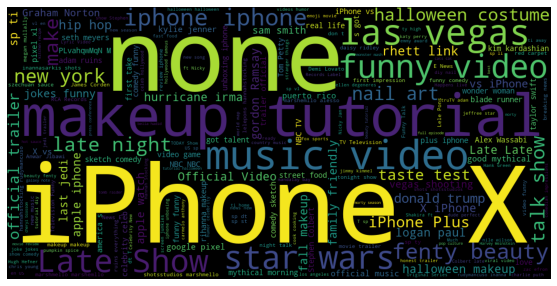

In [58]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Analysing Likes,Dislikes and views and find these are co-related using regression plot

Text(0.5, 1.0, 'Regession plot of views v/s likes')

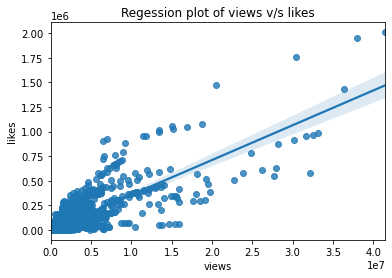

In [59]:
sns.regplot(data=videos, x='views',y='likes')
plt.title('Regession plot of views v/s likes')

Text(0.5, 1.0, 'Regession plot of views v/s dislikes')

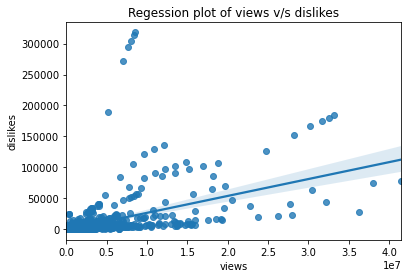

In [60]:
sns.regplot(data=videos, x='views',y='dislikes')
plt.title('Regession plot of views v/s dislikes')

Co-relation matrix:it is evidence of above analysis

In [61]:
df_corr=videos[['views','likes','dislikes']]
df_corr

views   likes  dislikes
0     4394029  320053      5931
1     7860119  185853     26679
2     5845909  576597     39774
3     2642103   24975      4542
4     1168130   96666       568
...       ...     ...       ...
7987   440393   14362       390
7988    55762    1265       760
7989   142908    7088        68
7990    24532    2148        77
7991   144039    1574        59

[7992 rows x 3 columns]

In [62]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

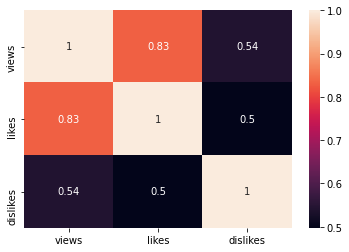

In [63]:
sns.heatmap(df_corr.corr(),annot=True)

Emoji's in the comment Analysis 

In [75]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [76]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [77]:
# printing uni-code-corrector
print('\U0001F600')

😀


In [67]:
! pip install emoji

In [68]:
import emoji

In [69]:
len(comments)

718424

In [82]:
# extracting emoji from text
comment=comments['comment_text'][1]

In [83]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

[]

In [84]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [85]:
len(str)

0